# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [4]:
import json
from pandas.io.json import json_normalize
from collections import Counter
import matplotlib.pyplot as plt 


## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [11]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [12]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [13]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [14]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [15]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [16]:
# load full json as Pandas dataframe
full_json_df = pd.read_json('data/world_bank_projects.json')

In [17]:
# check the header of json file to familiarize myself with the data
full_json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [18]:
# check in info of json fie
full_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [19]:
# 1. Find the 10 countries with most projects 
# Counting projects by the names. If there is name, the project exists. 
countcountries_df = full_json_df.groupby('countryname').count().sort_values(by=['project_name'], ascending = False)
countcountries_df['project_name'][:10]

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: project_name, dtype: int64

In [21]:
# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
# Counting from the list of dictionaries in every row
# It is worth noticing that some entries have the same code repeated several times (such as 6, 6, 6). 
# Below I am counting each theme code (x3 in the above case), therefore that case that theme weights more. 
# If necessary, we count remove the extra 2

# Defining function CountThemes
def CountThemes(mytheme_list, list_codes):
    """ Counts the elements inside every theme list"""
   
    for item in mytheme_list:
        code = item.get('code');
        list_codes.append(code)
        
# Apply function in every row 
list_codes= []
# List comprehension 
for index, row in full_json_df.iterrows():
    CountThemes(row.mjtheme_namecode, list_codes)

Code Theme:11 -- Count:250
Code Theme:10 -- Count:216
Code Theme:8 -- Count:210
Code Theme:2 -- Count:199
Code Theme:6 -- Count:168
Code Theme:4 -- Count:146
Code Theme:7 -- Count:130
Code Theme:5 -- Count:77
Code Theme:9 -- Count:50
Code Theme:1 -- Count:38
Counter({'11': 250, '10': 216, '8': 210, '2': 199, '6': 168, '4': 146, '7': 130, '5': 77, '9': 50, '1': 38, '3': 15})


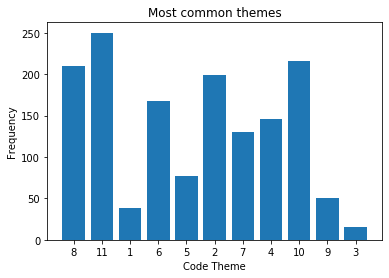

In [22]:
# Libraries added on top
coun = Counter(list_codes)
# This prints 3 most frequent characters 
for code, count in coun.most_common(10): 
    print('Code Theme:{0} -- Count:{1}'.format(code, count)) 
    
print(coun)
plt.bar(coun.keys(), coun.values())
plt.xlabel('Code Theme')
plt.ylabel('Frequency')
plt.title('Most common themes')
plt.show()

In [23]:
# 3. Create a dataframe with the missing names filled in
# Below is entr 12 that has a name filled with ''
one_countthemes_df = full_json_df.loc[12,'mjtheme_namecode']
print(one_countthemes_df)

[{'code': '4', 'name': ''}]


In [24]:
# Defining function CountThemes
def FillNameThemes(mytheme_list):
    """ Counts the elements inside every theme list"""
    
    #Below is the corresponsing names for the codes 
    switcher = { 
                '1': 'Economic management', 
                '2': 'Public sector governance', 
                '4': 'Financial and private sector development',
                '5': 'Trade and integration',
                '6': 'Social protection and risk management',
                '7':'Social dev/gender/inclusion',
                '8':'Human development',
                '9':'Urban development',
                '10':'Rural development',
                '11':'Environment and natural resources management',               
            }  
               
    for item in mytheme_list:
        name = item.get('name');
        code = item.get('code');
        if name =='':
            item['name'] = switcher.get(code)


# Apply the function in 
for index, row in full_json_df.iterrows():
    FillNameThemes(row.mjtheme_namecode)
            

In [25]:
# Row 12 had a empty Name field before 
one_countthemes_df = full_json_df.loc[12,'mjtheme_namecode']
print(one_countthemes_df)

# Assert if the name fild is None (We could loop through all the columns for a detailed safetly checked)
assert len(one_countthemes_df[0].get('name')) != None,"Name is empty."


[{'code': '4', 'name': 'Financial and private sector development'}]


Name Theme:11 -- Count:250
Name Theme:10 -- Count:216
Name Theme:8 -- Count:210
Name Theme:2 -- Count:199
Name Theme:6 -- Count:168
Name Theme:4 -- Count:146
Name Theme:7 -- Count:130
Name Theme:5 -- Count:77
Name Theme:9 -- Count:50
Name Theme:1 -- Count:38
Counter({'11': 250, '10': 216, '8': 210, '2': 199, '6': 168, '4': 146, '7': 130, '5': 77, '9': 50, '1': 38, '3': 15})


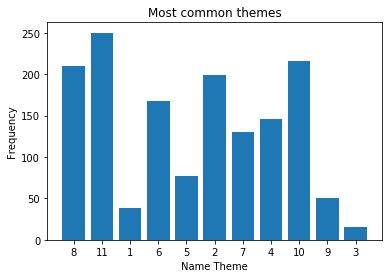

In [28]:
# Make an histogram with the code code names instead of the wit the names
# This one and the above should be quivalent
# Defining a new function CountThemesNames
def CountThemesNames(mytheme_list, list_names):
    """ Counts the elements inside every theme list"""
   
    for item in mytheme_list:
        name = item.get('name');
        list_names.append(name)

# Apply function in every row 
list_names= []
# List comprehension 
for index, row in full_json_df.iterrows():
    CountThemes(row.mjtheme_namecode, list_names)
    
# Libraries added on top
coun = Counter(list_names)
# This prints 3 most frequent characters 
for name, count in coun.most_common(10): 
    print('Name Theme:{0} -- Count:{1}'.format(name, count)) 
    
print(coun)
plt.bar(coun.keys(), coun.values())
plt.xlabel('Name Theme')
plt.ylabel('Frequency')
plt.title('Most common themes')
plt.show()
    
    